#PARTE 1


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:

from google.colab import files
uploaded = files.upload()
import io
import scipy.optimize as spo
df2 = pd.read_csv(io.BytesIO(uploaded['DataRotacion.csv']))

df2

Saving DataRotacion.csv to DataRotacion (1).csv


,h,angle,y,sigmay
0,10.0,10.0,0.0017,0.0015
1,20.0,10.0,0.0016,0.0015
2,30.0,10.0,0.0027,0.0015
3,40.0,10.0,0.0055,0.0015
4,50.0,10.0,0.0083,0.0015
5,60.0,10.0,0.0085,0.0015
6,70.0,10.0,0.0096,0.0015
7,80.0,10.0,0.0144,0.0015
8,90.0,10.0,0.0200,0.0015
9,100.0,10.0,0.0208,0.0015


In [ ]:
#a
datos = np.array(df2,np.float64)

In [ ]:
#b
datos30=[]
for i in range(len(datos)):
  if datos[i][1] ==30:
    datos30.append((datos[i]))
datos30

[array([1.0e+01, 3.0e+01, 1.3e-03, 1.5e-03]),
 array([2.0e+01, 3.0e+01, 1.7e-03, 1.5e-03]),
 array([3.0e+01, 3.0e+01, 3.8e-03, 1.5e-03]),
 array([4.0e+01, 3.0e+01, 5.9e-03, 1.5e-03]),
 array([5.0e+01, 3.0e+01, 6.7e-03, 1.5e-03]),
 array([6.0e+01, 3.0e+01, 9.4e-03, 1.5e-03]),
 array([7.00e+01, 3.00e+01, 1.22e-02, 1.50e-03]),
 array([8.00e+01, 3.00e+01, 1.32e-02, 1.50e-03]),
 array([9.00e+01, 3.00e+01, 1.51e-02, 1.50e-03]),
 array([1.00e+02, 3.00e+01, 1.86e-02, 1.50e-03])]

In [ ]:
array30 = np.asarray(datos30)

In [ ]:
#c
def desviacion(h,p,latitud,g):
  return ((2*np.sqrt(2))/3)*p*np.cos(latitud)*np.sqrt(h**3/g)

In [ ]:
N = len(array30[:,0])
sigma = array30[:,3]
sigma = np.abs(sigma)
x=array30[:,0]
def GetModel(x,p,g):
    y = 0
    for n in range(len(p)):
        y += ((2*np.sqrt(2))/3)*p[n]*np.cos(30)*np.sqrt(x**3/g)
    return y
#-----------------------------
#d
def Chi2(p,x,y,sigma,g):
    return np.sum (  (y-GetModel(x,p,g))**2/(2*sigma**2) )
#----------------------------
p0 = np.ones(6)
p0
nll = lambda *p: Chi2(*p,9.81)
result = spo.minimize( nll, p0, args=(array30[:,0],array30[:,2],sigma),options={'disp':True} )
bestparam = result.x
bestparam
_x = np.linspace(np.min(array30[:,0]),np.max(array30[:,0]),10)
_y = GetModel(_x,bestparam,10)

         Current function value: 1.145716
         Iterations: 3
         Function evaluations: 327
         Gradient evaluations: 45


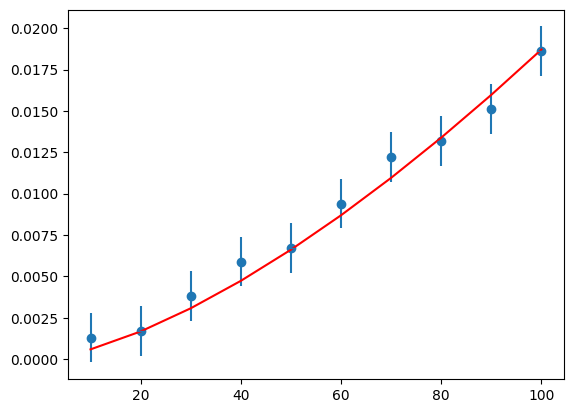

In [ ]:
#f
plt.errorbar(array30[:,0],array30[:,2],xerr=0,yerr=array30[:,3],fmt="_")
plt.scatter(array30[:,0],array30[:,2])
plt.plot(_x,_y,color='r')

In [ ]:
#e
Omega=(sum(bestparam)/len(bestparam))
Omega

6.778992728414164e-05

#PARTE 2

In [ ]:
k=[]
for i in range(30):
  k.append(9.81 + np.random.normal(loc=0,scale=1))
k

[7.2322477730841195,
 10.490313733614693,
 11.622410588597337,
 11.03556674952253,
 10.221604678194097,
 9.060261234847644,
 9.488426644015949,
 9.762199046922563,
 9.804308955420321,
 7.599450469506919,
 9.181008176868986,
 10.193353062905135,
 9.943700610955226,
 9.872680280851995,
 8.23343023127894,
 9.80823809199226,
 9.785170694134141,
 8.623291751108045,
 8.685421354719026,
 9.18593318797028,
 8.149245242799275,
 6.8128738127749635,
 8.717818308519623,
 10.24846158244948,
 11.998388655665764,
 8.419378583937048,
 10.213583887133145,
 11.018431250337816,
 11.148581810048992,
 8.930246454177649]

In [ ]:
gravedad1=np.mean(k)

In [ ]:
#c)
gravedad=np.array([gravedad1])
gravedad

array([9.55319195])

In [ ]:
#d
new=[]
for i in range(len(datos30)):
  for j in range(300):
    k=[]
    k.append(datos30[i][2] + np.random.normal(loc=0,scale=0.0015))
  final=np.mean(k)
  new.append(final)

new


[0.0024296385821984054,
 0.0032460479387930027,
 0.0027564556325792556,
 0.00679244250006056,
 0.007215239265386404,
 0.009893731711098166,
 0.013774235712190051,
 0.012815524538102582,
 0.014227863763451466,
 0.01930719049218195]

In [ ]:
#e
def g_w(array2):

  array=array2.copy()
  for i in range(len(array2)):
    array[i][2]= array2[i][2] + np.random.normal(loc=0,scale=0.0015) 

  n=9.81 + np.random.normal(loc=0,scale=1) 
  nll2 = lambda *p: Chi2(*p,n)
  N = len(array[:,0])
  sigma = np.abs(array[:,3])
  x=array[:,0]
  p0 = np.ones(6)
  p0
  result = spo.minimize( nll2, p0, args=(array[:,0],array[:,2],sigma),options={'disp':True} )
  bestparam = result.x
  m=np.mean(bestparam)
  
  return np.array([m,n])
g_w(array30)

         Current function value: 10.154959
         Iterations: 8
         Function evaluations: 382
         Gradient evaluations: 53


array([6.92991792e-05, 9.09859753e+00])

In [ ]:
#f
distri=np.empty((0,2))
for i in range(1000):
  c=g_w(array30)
  distri=np.append(distri,[c],axis=0)


         Current function value: 5.886305
         Iterations: 8
         Function evaluations: 439
         Gradient evaluations: 61
         Current function value: 7.209831
         Iterations: 7
         Function evaluations: 404
         Gradient evaluations: 56
         Current function value: 3.217423
         Iterations: 7
         Function evaluations: 731
         Gradient evaluations: 102
         Current function value: 11.393686
         Iterations: 7
         Function evaluations: 614
         Gradient evaluations: 86
         Current function value: 3.068170
         Iterations: 4
         Function evaluations: 313
         Gradient evaluations: 43
         Current function value: 1.190078
         Iterations: 3
         Function evaluations: 222
         Gradient evaluations: 30
         Current function value: 5.719397
         Iterations: 9
         Function evaluations: 432
         Gradient evaluations: 60
         Current function value: 0.660563
         Iteration

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([5.00000000e-05, 5.08974359e-05, 5.17948718e-05, 5.26923077e-05,
        5.35897436e-05, 5.44871795e-05, 5.53846154e-05, 5.62820513e-05,
        5.71794872e-05, 5.80769231e-05, 5.89743590e-05, 5.98717949e-05,
        6.07692308e-05, 6.16666667e-05, 6.25641026e-05, 6.34615385e-05,
        6.43589744e-05, 6.52564103e-05, 6.61538462e-05, 6.70512821e-05,
        6.79487179e-05, 6.88461538e-05, 6.97435897e-05, 7.06410256e-05,
        7.15384615e-05, 7.24358974e-05, 7.33333333e-05, 7.42307692e-05,
        7.51282051e-05, 7.60256410e-05, 7.69230769e-05, 7.78205128e-05,
        7.87179487e-05, 7.96153846e-05, 8.05128205e-05, 8.14102564e-05,
        8.23076923e-05, 8.32051282e-05, 8.41025641e-05, 8.50000000e-05]),
 array([ 6.        ,  6.20512

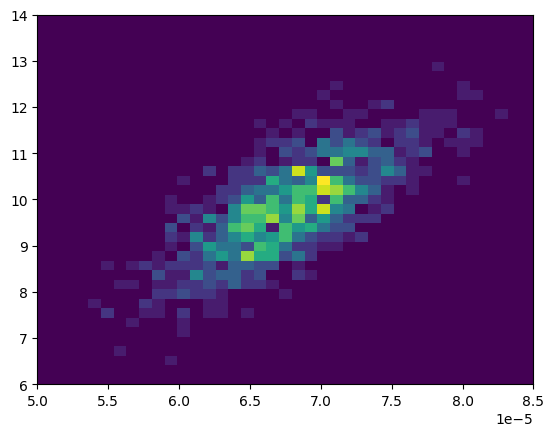

In [ ]:

binsx=np.linspace(5/100000,8.5/100000,40)
binsy=np.linspace(6,14,40)
H2=plt.hist2d(distri[:,0],distri[:,1],bins=(binsx,binsy))
H2

#g) ¿Estan las variables correlacionadas?
Sí lo estan, pues el comportamiento de una de ellas afecta a la otra, lo cual podemos ver en el grafico del punto e. Si la variable gravedad aumenta, la velocidad tambien lo hace, es decir, tienen una correlacion positiva.

In [ ]:
#H
H1 = np.sum(H2[0],axis=1)
H1

array([ 0.,  0.,  0.,  0.,  1.,  3.,  2.,  3.,  5., 10., 15., 21., 28.,
       38., 37., 58., 76., 78., 76., 69., 86., 66., 69., 72., 50., 32.,
       28., 24., 14., 13.,  8.,  4.,  3.,  7.,  3.,  0.,  1.,  0.,  0.])

In [ ]:
cs = np.cumsum(H1)
ij = np.searchsorted( cs, np.percentile(cs,16) )
ii = np.searchsorted( cs, np.percentile(cs,50) )
ji = np.searchsorted( cs, np.percentile(cs,84) )

Omega222=np.sort(distri[:,0])
omegafinal=Omega222[int(cs[ii])]
omegafinal

6.79537247378903e-05